<a href="https://colab.research.google.com/github/KondrushinIlya/kepo/blob/master/RetinaForStudent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Клонируем файлы модели для работы с ней из репозитория GitHub по ссылке  https://github.com/AlexandrAstafiev/keras-retinanet.git

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet
#!git clone https://github.com/AlexandrAstafiev/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 14.17 MiB/s, done.
Resolving deltas: 100% (4200/4200), done.


2. Устанавливаем зависимости, необходимые для модели.
pip — система управления пакетами, которая используется для установки и управления программными пакетами, написанными на Python. 

In [ ]:
%cd keras-retinanet/
!pip install .
!python setup.py build_ext --inplace

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=168004 sha256=29323f7c4eee521d83a4b22d5a4b9a76eddf806d8a26c4ef70e4eed223de43ae
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=d915dc710c2154e6a55148a57a7e97e7389dbd9001ac6e6b9334d314c1414958
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet
running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/k

3. Добавляем все зависимости в проект, для их дальнейшего использования

In [ ]:
# Функции работы с ОС
import os

# Для удаления каталогов
import shutil

# Архиватор
import zipfile

# Работа с сылками
import urllib
import urllib.parse
import requests
import xml.etree.ElementTree as ET

# NumPy — библиотека с открытым исходным кодом для языка программирования Python. Возможности:
#    -поддержка многомерных массивов (включая матрицы);
#    -поддержка высокоуровневых математических функций, предназначенных для работы с многомерными массивами.
import numpy as np

# Работа с csv файлами
import csv

#pandas — программная библиотека на языке Python для обработки и анализа данных. 
#Работа pandas с данными строится поверх библиотеки NumPy, являющейся инструментом более низкого уровня. 
#Предоставляет специальные структуры данных и операции для манипулирования числовыми таблицами и временны́ми рядами. 
import pandas

# Работа с файлами загрузить/скачать
from google.colab import drive
from google.colab import files

# Библиотека работы с картинками
from PIL import Image   
# Библиотека random
import random 
#import sys

4. Загрузка исходников для генерации датасета и определение класса для хранения параметров документа

In [ ]:
if (os.path.exists("/content/source")==True):                                     # Если папка есть, то удаляем и создаём пустую
  shutil.rmtree("/content/source", ignore_errors=False, onerror=None)
  os.mkdir("/content/source")
else:                                                                             # Иначе просто создаем, чтобы в нее записать
  os.mkdir("/content/source")
os.chdir("/content/source")                                                       # Меняем рабочий каталог

# Клонируем данные для генерации датасета
!git clone https://github.com/AlexandrAstafiev/DocRecogn.git                      

# Функция получения количества файлов в каталоге
def countFiles(path):
  count=-1
  for f in os.listdir(path):
    count = count + 1
  return count

# Класс параметров объектов в документе
class DocumentMarkup:
    
    # Получаем данные о параметров объектов
    def __init__(self, hwb, hhb, twb, thb, pwb, phb, bwb, bhb, rwb, rhb):
          self.header_width_begin = hwb                                                        # Ширина отступа заголовка
          self.header_height_begin = hhb                                                       # Высота отступа заголовка
          self.table_width_begin = twb                                                         # Ширина отступа таблицы
          self.table_height_begin = thb                                                        # Высота отступа таблицы
          self.paragraph_width_begin = pwb                                                     # Ширина отступа параграфа
          self.paragraph_height_begin = phb                                                    # Высота отступа параграфа
          self.blue_width_begin = bwb                                                          # Ширина отступа синей печати
          self.blue_height_begin = bhb                                                         # Высота отступа синей печати
          self.red_width_begin = rwb                                                           # Ширина отступа красной печати
          self.red_height_begin = rhb                                                          # Высота отступа красной печати

    def getHeaderInfo(self) :    
        print(self.header_width_begin, self.header_height_begin)
    
    def showInfo(self):
        print("Name: ", self.name)
        print("Age: ", self.age)
        print("Gender: ", self.gender)


Cloning into 'DocRecogn'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 339 (delta 4), reused 0 (delta 0), pack-reused 327
Receiving objects: 100% (339/339), 47.96 MiB | 26.65 MiB/s, done.
Resolving deltas: 100% (115/115), done.


5. Собственно генерация
Результат: датасет в каталоге "/content/keras-retinanet/dataset"

In [ ]:
path = "/content/source/DocRecogn/"
path2 = "/content/keras-retinanet/"
if (os.path.exists(path + "result")==False):
  os.mkdir(path + "result")
if (os.path.exists(path2 + "dataset")==True):
  shutil.rmtree("/content/keras-retinanet/dataset", ignore_errors=False, onerror=None)
  os.mkdir(path2 + "dataset")

if (os.path.exists(path2 + "dataset")==False):
  os.mkdir(path2 + "dataset")

# Определяем количество файлов в каталогах
path = "/content/source/DocRecogn/"
c_header = countFiles(path + "Header/")-1
c_table = countFiles(path + "Table/")-1
c_paragraph = countFiles(path + "Paragraph/")-1
c_blue = countFiles(path + "Blue/")-1
c_red = countFiles(path + "Red/")-1

# Количество генерируемых изображений
n=100
# Файл хранения аннотаций
csv = open(path+"annotation.csv", 'w')
csv.write("filename,width,height,class,xmin,ymin,xmax,ymax"+'\n')

# Генерация обучающей выборки
for i in range(n):
  print("Сгенерировано " + str(i) + " из " + str(n))
  blank = Image.open(path + "blank.png")                                            # Открываем бланк
  (b_width, b_height) = blank.size

  #############################################################################  
  ################### Выборка частей документа ################################
  #############################################################################
  # Добавляем заголовок
  number = random.randint(1, c_header)
  header = Image.open(path + "Header/" + str(number) + ".JPG")
  #header = header.rotate(random.randint(1, 359))
  (header_width, header_height) = header.size

  # Добавляем заголовок
  number = random.randint(1, c_table)
  table = Image.open(path + "Table/" + str(number) + ".JPG")
  #table = table.rotate(random.randint(1, 359))
  (table_width, table_height) = table.size

  # Добавляем заголовок
  number = random.randint(1, c_paragraph)
  paragraph = Image.open(path + "Paragraph/" + str(number) + ".JPG")
  #paragraph = paragraph.rotate(random.randint(1, 359))
  (paragraph_width, paragraph_height) = paragraph.size

  # Добавляем заголовок
  number = random.randint(1, c_blue)
  blue = Image.open(path + "Blue/" + str(number) + ".JPG")
  blue = blue.rotate(random.randint(1, 359), fillcolor='white', expand=True)
  (blue_width, blue_height) = blue.size
  # Меняем размер
  new_blue_width = blue_width
  new_blue_height = blue_height
  if (blue_width>350):
    k = 340/blue_width # Коэффициент изменения размера
    new_blue_width = blue_width*k
    new_blue_height = blue_height*k
    blue = blue.resize((int(new_blue_width), int(new_blue_height)))

  # Добавляем заголовок
  number = random.randint(1, c_red)
  red = Image.open(path + "Red/" + str(number) + ".JPG")
  red = red.rotate(random.randint(1, 359),fillcolor='white', expand=True)
  (red_width, red_height) = red.size
  # Меняем размер
  new_red_width = red_width
  new_red_height = red_height
  if (red_width>350):
    k = 340/red_width # Коэффициент изменения размера
    new_red_width = red_width*k
    new_red_height = red_height*k
    red = red.resize((int(new_red_width), int(new_red_height)))
  #############################################################################


  #############################################################################  
  ################### Создаем документ на чистом листе ########################
  #############################################################################
  
  # Создаем экземпляр класса DocumentMarkup, чтобы хранить все в одном месте
  trainDoc = DocumentMarkup(
  350,                                                                             # Ширина отступа заголовка
  10,                                                                              # Высота отступа заголовка
  10,                                                                              # Ширина отступа таблицы
  10 + header_height,                                                              # Высота отступа таблицы
  10,                                                                              # Ширина отступа параграфа
  10 + header_height + table_height,                                               # Высота отступа параграфа
  10,                                                                              # Ширина отступа синей печати
  10 + header_height + table_height + paragraph_height,                            # Высота отступа синей печати
  350,                                                                             # Ширина отступа красной печати
  10 + header_height + table_height + paragraph_height)                            # Высота отступа красной печати

  
  blank.paste(header,(trainDoc.header_width_begin,trainDoc.header_height_begin))
  blank.paste(table,(trainDoc.table_width_begin, trainDoc.table_height_begin))
  blank.paste(paragraph,(trainDoc.paragraph_width_begin, trainDoc.paragraph_height_begin))
  blank.paste(blue,(trainDoc.blue_width_begin, trainDoc.blue_height_begin))
  blank.paste(red,(trainDoc.red_width_begin, trainDoc.red_height_begin))
  #if (i<n*0.8):
  blank.save(path2+"dataset/img" + str(i) + ".jpg")
  #if (i>n*0.8):
  #  blank.save(path+"traunTest/img" + str(i) + ".jpg")
  #############################################################################


  #############################################################################  
  ################### Создаем xml файл разметки ###############################
  #############################################################################
  curFileName = "img" + str(i) + ".jpg"
  # Заголовок
  xml = open(path2+"dataset/img" + str(i) + ".xml", 'w')
  xml.write("<annotation verified=\"yes\">"+'\n')
  xml.write(" <folder>result</folder>" +'\n')
  xml.write(" <filename>" + curFileName +"</filename>" +'\n')
  xml.write(" <path>" + path2+"dataset/img" + str(i) + ".jpg" + "</path>" +'\n')
  xml.write(" <source>" +'\n')
  xml.write("   <database>Unknown</database>" +'\n')
  xml.write(" </source>" +'\n')
  xml.write(" <size>" +'\n')
  xml.write("   <width>"+ str(b_width) +"</width>" +'\n')
  xml.write("   <height>"+ str(b_height) +"</height>" +'\n')
  xml.write("   <depth>3</depth>" +'\n')
  xml.write(" </size>" +'\n')
  xml.write(" <segmented>0</segmented>" +'\n')
  # Тело файла
  # Заголовок
  xml.write(" <object>" +'\n')
  xml.write(" <name>Header</name>" + '\n')
  xml.write(" 	<pose>Unspecified</pose>" +'\n')
  xml.write(" 	<truncated>0</truncated>" +'\n')
  xml.write(" 	<difficult>0</difficult>" +'\n')
  xml.write(" 	<bndbox>" +'\n')
  xml.write(" 			<xmin>" + str(trainDoc.header_width_begin) + "</xmin>" +'\n')
  xml.write(" 			<ymin>" + str(trainDoc.header_height_begin) + "</ymin>" +'\n')
  xml.write(" 			<xmax>" + str(trainDoc.header_width_begin + header_width) + "</xmax>" +'\n')
  xml.write(" 			<ymax>" + str(trainDoc.header_height_begin + header_height) + "</ymax>" +'\n')
  xml.write(" 	</bndbox>" +'\n')
  xml.write(" </object>" +'\n')
  csv.write(curFileName+","+str(b_width)+","+str(b_height)+",Header,"+str(trainDoc.header_width_begin)+","+str(trainDoc.header_height_begin)+","+str(trainDoc.header_width_begin + header_width)+","+str(trainDoc.header_height_begin + header_height)+'\n')
# Таблица
  xml.write(" <object>" +'\n')
  xml.write(" <name>Table</name>" + '\n')
  xml.write(" 	<pose>Unspecified</pose>" +'\n')
  xml.write(" 	<truncated>0</truncated>" +'\n')
  xml.write(" 	<difficult>0</difficult>" +'\n')
  xml.write(" 	<bndbox>" +'\n')
  xml.write(" 			<xmin>" + str(trainDoc.table_width_begin) + "</xmin>" +'\n')
  xml.write(" 			<ymin>" + str(trainDoc.table_height_begin) + "</ymin>" +'\n')
  xml.write(" 			<xmax>" + str(trainDoc.table_width_begin + table_width) + "</xmax>" +'\n')
  xml.write(" 			<ymax>" + str(trainDoc.table_height_begin + table_height) + "</ymax>" +'\n')
  xml.write(" 	</bndbox>" +'\n')
  xml.write(" </object>" +'\n')
  csv.write(curFileName+","+str(b_width)+","+str(b_height)+",Table,"+str(trainDoc.table_width_begin)+","+str(trainDoc.table_height_begin)+","+str(trainDoc.table_width_begin + table_width)+","+str(trainDoc.table_height_begin + table_height)+'\n')
# Параграф
  xml.write(" <object>" +'\n')
  xml.write(" <name>Paragraph</name>" + '\n')
  xml.write(" 	<pose>Unspecified</pose>" +'\n')
  xml.write(" 	<truncated>0</truncated>" +'\n')
  xml.write(" 	<difficult>0</difficult>" +'\n')
  xml.write(" 	<bndbox>" +'\n')
  xml.write(" 			<xmin>" + str(trainDoc.paragraph_width_begin) + "</xmin>" +'\n')
  xml.write(" 			<ymin>" + str(trainDoc.paragraph_height_begin) + "</ymin>" +'\n')
  xml.write(" 			<xmax>" + str(trainDoc.paragraph_width_begin + paragraph_width) + "</xmax>" +'\n')
  xml.write(" 			<ymax>" + str(trainDoc.paragraph_height_begin + paragraph_height) + "</ymax>" +'\n')
  xml.write(" 	</bndbox>" +'\n')
  xml.write(" </object>" +'\n')
  csv.write(curFileName+","+str(b_width)+","+str(b_height)+",Paragraph,"+str(trainDoc.paragraph_width_begin)+","+str(trainDoc.paragraph_height_begin)+","+str(trainDoc.paragraph_width_begin + paragraph_width)+","+str(trainDoc.paragraph_height_begin + paragraph_height)+'\n')
# Синяя печать
  xml.write(" <object>" +'\n')
  xml.write(" <name>Blue</name>" + '\n')
  xml.write(" 	<pose>Unspecified</pose>" +'\n')
  xml.write(" 	<truncated>0</truncated>" +'\n')
  xml.write(" 	<difficult>0</difficult>" +'\n')
  xml.write(" 	<bndbox>" +'\n')
  xml.write(" 			<xmin>" + str(trainDoc.blue_width_begin) + "</xmin>" +'\n')
  xml.write(" 			<ymin>" + str(trainDoc.blue_height_begin) + "</ymin>" +'\n')
  xml.write(" 			<xmax>" + str(trainDoc.blue_width_begin + int(new_blue_width)) + "</xmax>" +'\n')
  xml.write(" 			<ymax>" + str(trainDoc.blue_height_begin + int(new_blue_height)) + "</ymax>" +'\n')
  xml.write(" 	</bndbox>" +'\n')
  xml.write(" </object>" +'\n')
  csv.write(curFileName+","+str(b_width)+","+str(b_height)+",Blue,"+str(trainDoc.blue_width_begin)+","+str(trainDoc.blue_height_begin)+","+str(trainDoc.blue_width_begin + blue_width)+","+str(trainDoc.blue_height_begin + blue_height)+'\n')

# Красная печать
  xml.write(" <object>" +'\n')
  xml.write(" <name>Red</name>" + '\n')
  xml.write(" 	<pose>Unspecified</pose>" +'\n')
  xml.write(" 	<truncated>0</truncated>" +'\n')
  xml.write(" 	<difficult>0</difficult>" +'\n')
  xml.write(" 	<bndbox>" +'\n')
  xml.write(" 			<xmin>" + str(trainDoc.red_width_begin) + "</xmin>" +'\n')
  xml.write(" 			<ymin>" + str(trainDoc.red_height_begin) + "</ymin>" +'\n')
  xml.write(" 			<xmax>" + str(trainDoc.red_width_begin + int(new_red_width)) + "</xmax>" +'\n')
  xml.write(" 			<ymax>" + str(trainDoc.red_height_begin + int(new_red_height)) + "</ymax>" +'\n')
  xml.write(" 	</bndbox>" +'\n')
  xml.write(" </object>" +'\n')
  csv.write(curFileName+","+str(b_width)+","+str(b_height)+",Red,"+str(trainDoc.red_width_begin)+","+str(trainDoc.red_height_begin)+","+str(trainDoc.red_width_begin + red_width)+","+str(trainDoc.red_height_begin + red_height)+'\n')

  # Подвал
  xml.write("</annotation>" +'\n')
  xml.close()
  #############################################################################
  
  #files.download(path+"train/header" + str(i) + ".jpg")
  #files.download(path+"train/header" + str(i) + ".xml")
csv.close()


Сгенерировано 0 из 100
Сгенерировано 1 из 100
Сгенерировано 2 из 100
Сгенерировано 3 из 100
Сгенерировано 4 из 100
Сгенерировано 5 из 100
Сгенерировано 6 из 100
Сгенерировано 7 из 100
Сгенерировано 8 из 100
Сгенерировано 9 из 100
Сгенерировано 10 из 100
Сгенерировано 11 из 100
Сгенерировано 12 из 100
Сгенерировано 13 из 100
Сгенерировано 14 из 100
Сгенерировано 15 из 100
Сгенерировано 16 из 100
Сгенерировано 17 из 100
Сгенерировано 18 из 100
Сгенерировано 19 из 100
Сгенерировано 20 из 100
Сгенерировано 21 из 100
Сгенерировано 22 из 100
Сгенерировано 23 из 100
Сгенерировано 24 из 100
Сгенерировано 25 из 100
Сгенерировано 26 из 100
Сгенерировано 27 из 100
Сгенерировано 28 из 100
Сгенерировано 29 из 100
Сгенерировано 30 из 100
Сгенерировано 31 из 100
Сгенерировано 32 из 100
Сгенерировано 33 из 100
Сгенерировано 34 из 100
Сгенерировано 35 из 100
Сгенерировано 36 из 100
Сгенерировано 37 из 100
Сгенерировано 38 из 100
Сгенерировано 39 из 100
Сгенерировано 40 из 100
Сгенерировано 41 из 100
Сг

6. Исходя из датасета определяется количество классов, путь к файлу аннотаций и файлу классов.

In [ ]:
annotations = []
classes = set([])
DATASET_DIR = "/content/keras-retinanet/dataset"
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'
for xml_file in [f for f in os.listdir(DATASET_DIR) if f.endswith(".xml")]:
  tree = ET.parse(os.path.join(DATASET_DIR, xml_file))
  root = tree.getroot()

  file_name = None

  for elem in root:
    if elem.tag == 'filename':
      file_name = os.path.join(DATASET_DIR, elem.text)

    if elem.tag == 'object':
      obj_name = None
      coords = []
      for subelem in elem:
        if subelem.tag == 'name':
          obj_name = subelem.text
        if subelem.tag == 'bndbox':
          for subsubelem in subelem:
            coords.append(subsubelem.text)
      item = [file_name] + coords + [obj_name]
      annotations.append(item)
      classes.add(obj_name)

import csv
with open(ANNOTATIONS_FILE, 'w') as f:
  writer = csv.writer(f)
  writer.writerows(annotations)

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(classes):
    f.write('{},{}\n'.format(line,i))

7. Скачиваем предобученную модель с GitHub для того, чтобы получить изначальные веса, которые мы будем переобучать

In [ ]:
# Ссылка на расположение модели в проекте
PRETRAINED_MODEL = '/content/keras-retinanet/snapshots/_pretrained_model.h5'
# Ссылка на предобученную модель
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
# Операция копирования
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to /content/keras-retinanet/snapshots/_pretrained_model.h5


8. Непосредственно обучение

In [ ]:
!/content/keras-retinanet/keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 8 --steps 50 --epochs 5 csv /content/source/annotations.csv /content/source/classes.csv

2021-04-10 07:21:44.716979: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Creating model, this may take a second...
2021-04-10 07:21:46.831347: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-10 07:21:46.832427: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-10 07:21:46.902457: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-10 07:21:46.903090: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-04-10 07:21:46.903129: I

9. Устанавливаем порог. 0.8 означает, что  объекты, распознанные с точностью больше 80% будут отображаться, всё остальное будет отбрасываться.

In [ ]:
THRES_SCORE = 0.8

10. Подключаем необходимые библиотеки для работы с обученной нейронной сетью и создаём сессию.

In [ ]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%reload_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf
import tensorflow.keras.backend as K

def get_session():
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.compat.v1.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
tf.compat.v1.keras.backend.set_session(get_session())

11. Выбираем самый новый граф весов h5 в каталоге /content/keras-retinanet/snapshots

In [ ]:
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

# load label to names mapping for visualization purposes
labels_to_names = pandas.read_csv(CLASSES_FILE,header=None).T.loc[0].to_dict()

snapshots/resnet50_csv_01.h5


12. Определяем функцию использования предобученной нейронной сети на выбранном изображении

In [ ]:
def img_inference(img_path):
  image = read_image_bgr(img_infer)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
  print("processing time: ", time.time() - start)

  # correct for image scale
  boxes /= scale
  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
      if score < THRES_SCORE:
          break

      color = label_color(label)

      b = box.astype(int)
      draw_box(draw, b, color=color)

      caption = "{} {:.3f}".format(labels_to_names[label], score)
      draw_caption(draw, b, caption)

  plt.figure(figsize=(20, 20))
  plt.axis('off')
  plt.imshow(draw)
  plt.show()

13. Загружаем изображение на обработку

Saving 007_0e.png to 007_0e.png
Running inference on: 007_0e.png
processing time:  5.071453332901001


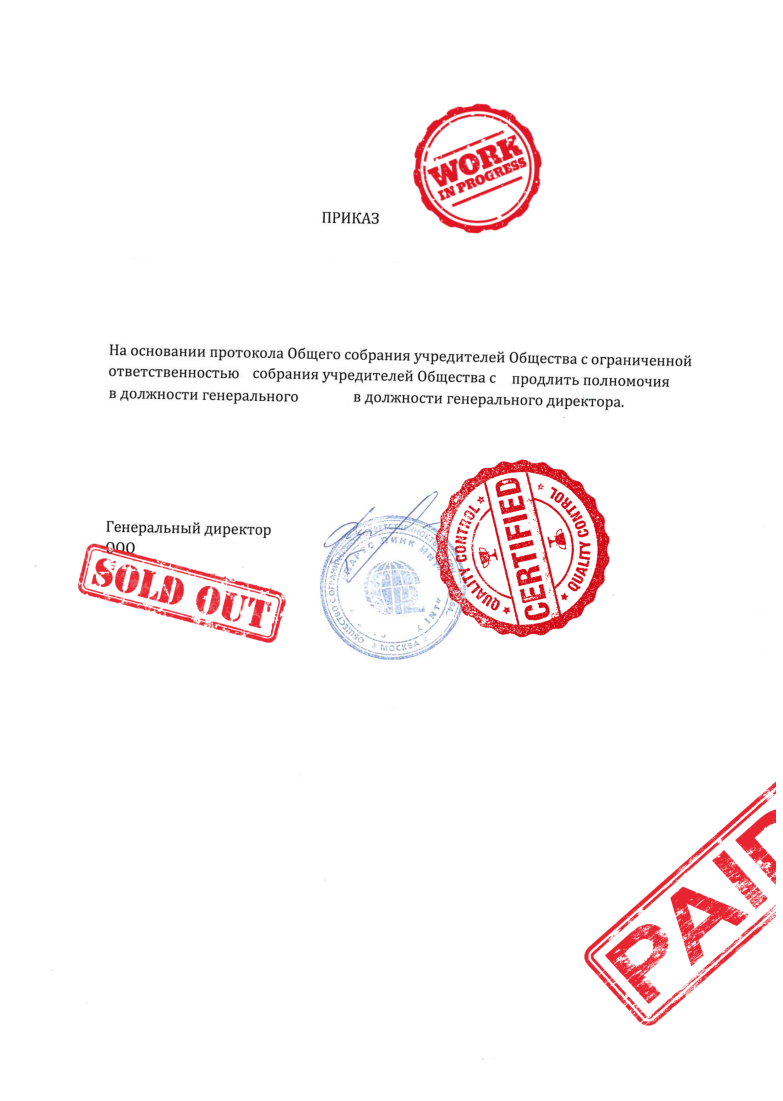

In [ ]:
uploaded = files.upload()
img_infer = list(uploaded)[0]

print('Running inference on: ' + img_infer)
img_inference(img_infer)